In [1]:
from astropy.nddata import NDDataArray as nda, StdDevUncertainty as sdu
from astropy.table import Table, column
import astropy.units as u
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

#### Q: what do the various halos look like, and how do they affect arm number?

In [65]:
def NFW_profile(r,rho0,r_s):
    rho = rho0 /((r/r_s) * (1+r/r_s)**2)
    return rho

def Burkert_profile(r,rho0,r_s):
    rho = rho0 * r_s**3 / ((r+r_s) * (r**2 + r_s**2))
    return rho

def Hernquist_profile(r,rho0,r_s):
    rho = rho0 * (r_s/r) / (r_s+r)**3
    return rho

def isothermal_profile(r,rho0,r_s):
    rho = rho0 / (1+(r/r_s)**2)
    return rho
    

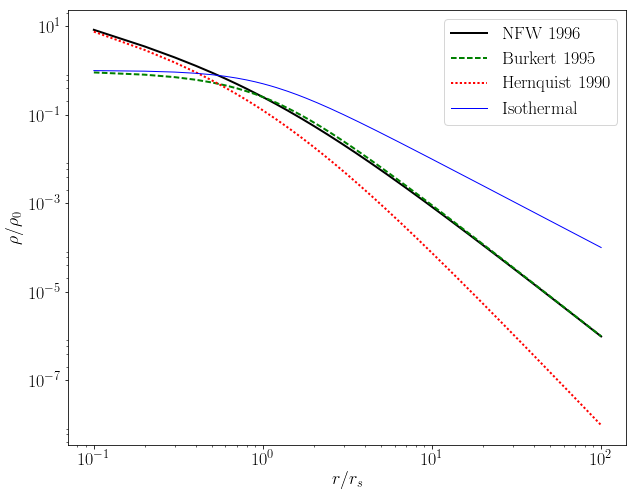

In [11]:
rho0 = 1
r_s = 1
r = np.linspace(0.1,100,1000)

rho_nfw = NFW_profile(r,rho0,r_s)
rho_b = Burkert_profile(r,rho0,r_s)
rho_h = Hernquist_profile(r,rho0,r_s)
rho_i = isothermal_profile(r,rho0,r_s)

_ = plt.plot(r,rho_nfw,color='k',lw=2,label='NFW 1996')
_ = plt.plot(r,rho_b,color='g',lw=2,linestyle='dashed',
             label='Burkert 1995')
_ = plt.plot(r,rho_h,color='r',lw=2,linestyle='dotted',
             label='Hernquist 1990')
_ = plt.plot(r,rho_i,color='b',lw=1,label='Isothermal')

_ = plt.xscale('log')
_ = plt.yscale('log')
_ = plt.legend()
_ = plt.xlabel('$r/r_s$')
_ = plt.ylabel(r'$\rho/\rho_0$')

In [ ]:
fig = plt.figure(figsize=(10,7.5))
ax = plt.subplot(111)

ys = np.linspace(0.25,2,100)
m_h = donghia_halo.m_hernquist()
m_b = donghia_halo.m_burkert()

_ = plt.plot(2*m_h['y'],m_h['m'],color='r',lw=2,linestyle='dotted',
             label='Hernquist 1990')
_ = plt.fill_between(2*m_h['y'],m_h['m']-m_h['error'],m_h['m']+m_h['error'],
                     color='r',alpha=0.2,label='_nolegend_')
_ = plt.plot(2*m_b['y'],m_b['m'],color='g',lw=2,linestyle='dashed',
             label='Burkert 1995')
_ = plt.fill_between(2*m_b['y'],m_b['m']-m_b['error'],m_b['m']+m_b['error'],
                     color='g',alpha=0.2,label='_nolegend_')


_ = ax.legend(edgecolor='k',fancybox=False,loc='upper left')
_ = ax.set_xlabel('$R/R_\mathrm{d}$')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')

ax.set_xticks([1,2,3,4,5])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([1,2,3,4,5,6,7,8,9,10,20,30])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#### How about a comparison of Burkert vs. Hernquist directly for a given halo?

In [7]:
# Milky Way parameters:
from halo import TotalHalo

M_b = [4e9] * u.Msun
delta_M_b = [0] * u.Msun

M_d = [5.6e10] * u.Msun
delta_M_d = [0.5e10] * u.Msun

a_b = [0.6] * u.kpc
delta_a_b = [0] * a_b

R_d = [2.15] * u.kpc
delta_R_d = [0.14] * u.kpc

M_hi = None
delta_M_hi = None

M_halo = [9.5e11] * u.Msun
delta_M_halo = [0.2] * M_halo

R_halo = [29.6] * u.kpc
delta_R_halo = [0.2] * R_halo

donghia_halo = TotalHalo(M_b,delta_M_b,M_d,delta_M_d,a_b,delta_a_b,
                         R_d,delta_R_d,M_hi,delta_M_hi,M_halo,delta_M_halo,
                         R_halo,delta_R_halo,1,0)

In [82]:
burkert_rho0 = donghia_halo.burkert_rho0()[0].nominal_value
#hernquist_rho0 = M_halo.value / (2 * math.pi) / 2
hernquist_rho0 = 2 * R_halo.value**3 * burkert_rho0

r = np.linspace(0,100*R_halo.value,10**3)

rho_b = Burkert_profile(r,burkert_rho0,R_halo.value)
rho_h = Hernquist_profile(r,hernquist_rho0,R_halo.value)
rho_nfw = NFW_profile(r,burkert_rho0,R_halo.value)

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


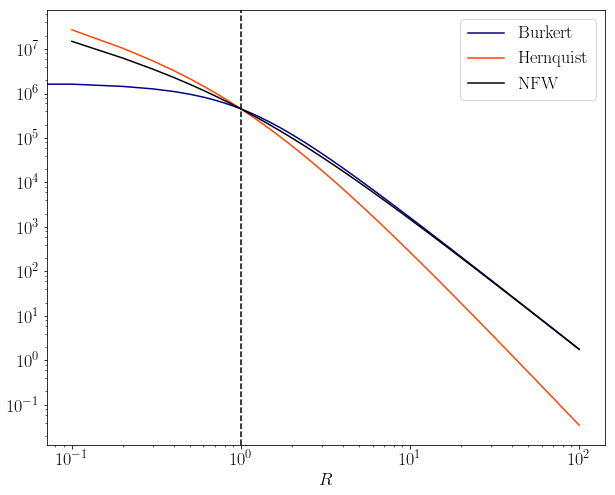

In [83]:
_ = plt.plot(r/R_halo.value,rho_b,color='darkblue',label='Burkert')
_ = plt.plot(r/R_halo.value,rho_h,color='orangered',label='Hernquist')
_ = plt.plot(r/R_halo.value,rho_nfw,color='k',label='NFW')
_ = plt.axvline(1,color='k',linestyle='dashed')
_ = plt.legend()

_ = plt.xscale('log')
_ = plt.yscale('log')

_ = plt.xlabel('$R$')

In [ ]:
m_haloes = np.linspace(0,100,100) * u.Msun

for m in m_haloes:
    